In [1]:
import pandas as pd
from scipy.cluster.hierarchy import linkage
df = pd.read_csv('datasets/Ashopping.csv', sep=',', encoding='CP949')
data_temp = df.sample(n=500, random_state=111)
X=data_temp[['Recency','Frequency','Monetary']]
X.head()

,Recency,Frequency,Monetary
190,6,1,1
104,7,6,7
295,5,3,4
12,7,3,4
87,7,3,5


In [2]:
#계층적 군집분석
cluster=linkage(X, method='average', metric='euclidean')
cluster[490:]

array([[969.        , 979.        ,   2.43557142,  72.        ],
       [978.        , 988.        ,   2.60070576,  33.        ],
       [984.        , 991.        ,   2.78913055,  40.        ],
       [981.        , 989.        ,   3.05800305, 374.        ],
       [986.        , 990.        ,   3.11871825,  81.        ],
       [161.        , 993.        ,   3.55293738, 375.        ],
       [994.        , 995.        ,   3.67802103, 456.        ],
       [987.        , 992.        ,   3.97824721,  44.        ],
       [996.        , 997.        ,   6.01862823, 500.        ]])

1,2열은 병합되는 군집번호, 3열은 군집간 거리, 4열은 군집에 속한 개체수이다.  
끝에서 2번째 단계인 군집간 거리가 3.978에서 6.01로 66% 증가했으므로 2개의 군집으로 나누는것이 적절하다.

In [3]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

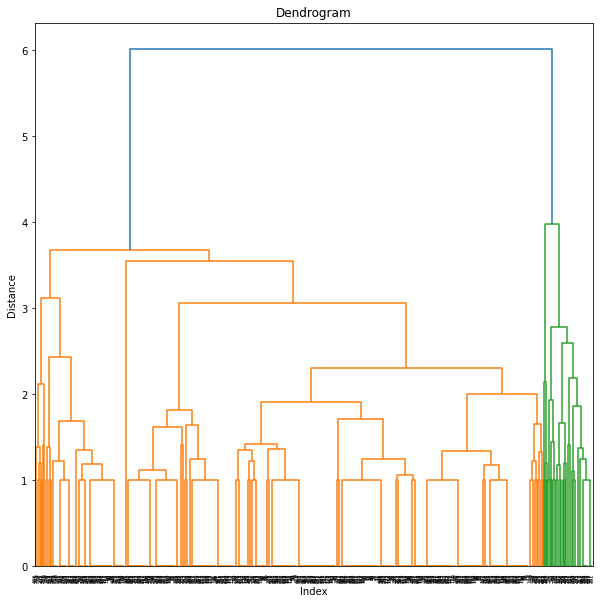

In [4]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.title('Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(cluster)
plt.show()

In [28]:
#비계층적 군집분석
from sklearn.cluster import KMeans
df = pd.read_csv('datasets/Ashopping.csv', sep=',', encoding='CP949')
X=df[['Recency','Frequency','Monetary']]
model = KMeans(n_clusters=3, max_iter=20, random_state=19).fit(X)
X['cluster_ID']=model.labels_

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_51464/38339899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster_ID']=model.labels_


In [29]:
#군집별 고객 수 확인
clu1=X[X.cluster_ID==0]
clu2=X[X.cluster_ID==1]
clu3=X[X.cluster_ID==2]
print('군집1 고객수:',clu1.cluster_ID.count())
print('군집2 고객수:',clu2.cluster_ID.count())
print('군집3 고객수:',clu3.cluster_ID.count())

군집1 고객수: 512
군집2 고객수: 77
군집3 고객수: 411


In [30]:
#군집별 평균 RFM 확인
print('군집1의 RFM 평균:',clu1.Recency.mean(), clu1.Frequency.mean(), clu1.Monetary.mean())
print('군집2의 RFM 평균:',clu2.Recency.mean(), clu2.Frequency.mean(), clu2.Monetary.mean())
print('군집3의 RFM 평균:',clu3.Recency.mean(), clu3.Frequency.mean(), clu3.Monetary.mean())

군집1의 RFM 평균: 6.8359375 3.212890625 2.892578125
군집2의 RFM 평균: 1.7792207792207793 3.207792207792208 3.7532467532467533
군집3의 RFM 평균: 6.9391727493917275 4.600973236009732 5.768856447688565


3개의 군집으로 나타난 결과를 보면 군집 고객수는 1>3>2 순서이고, 군집별 3가지 변수의 평균을 보면  
군집3이 우량고객 그룹임을 알 수 있다.  
Frequency와 Monetary를 보면 1과 2가 유사한 그룹으로 보이지만, Recency의 큰 차이가 있다.